<a href="https://colab.research.google.com/github/SandeepChudali2000/COVID_DATA/blob/main/Web_Scraping_Covid_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
url = 'https://www.worldometers.info/coronavirus/'


In [ ]:
html =  requests.get(url).text


In [ ]:
soup = BeautifulSoup(html,'html.parser')

In [ ]:
tbody = soup.find('tbody')

In [ ]:
tr = tbody.find_all('tr')


In [ ]:
complete_data=[]
for item in range(8,len(tr)):
    country_data=[]
    td=tr[item].find_all('td')# one table row has multiple table data
    for item in td:
        #print(item.text)
        country_data.append(item.text)# extract data of each country
    complete_data.append(country_data) # append data of each country on a list

In [ ]:
clean_data = list(map(lambda x:x[1:10],complete_data))

In [ ]:
data_frame = pd.DataFrame(clean_data)

In [ ]:
data_frame

,0,1,2,3,4,5,6,7,8
0,USA,"101,213,638",,"1,109,394",,"98,461,586",,"1,642,658","3,746"
1,India,"44,675,509",,"530,653",,"44,139,558",,"5,298",698
2,France,"38,331,430",,"159,517",,"37,128,030",,"1,043,883",869
3,Germany,"36,726,061",,"158,851",,"36,042,800","+27,000","524,410","1,406"
4,Brazil,"35,563,044",,"690,739",,"34,354,889",,"517,416","8,318"
...,...,...,...,...,...,...,...,...,...
225,Niue,187,,,,132,,55,
226,Vatican City,29,,,,29,,0,
227,Western Sahara,10,,1,,9,,0,
228,MS Zaandam,9,,2,,7,,0,


In [ ]:
col_name = ['C_name',
          'T_Case',
          'N_Case',
          'D_Case',
          'T_Recovered',
          'N_Recovered',  
         'A_Case',
          'S_Case',
          'Top_clases'
         ]

In [ ]:
data_frame.columns = col_name

In [ ]:
data_frame.head()

,C_name,T_Case,N_Case,D_Case,T_Recovered,N_Recovered,A_Case,S_Case,Top_clases
0,USA,"101,213,638",,"1,109,394",,"98,461,586",,"1,642,658","3,746"
1,India,"44,675,509",,"530,653",,"44,139,558",,"5,298",698
2,France,"38,331,430",,"159,517",,"37,128,030",,"1,043,883",869
3,Germany,"36,726,061",,"158,851",,"36,042,800","+27,000","524,410","1,406"
4,Brazil,"35,563,044",,"690,739",,"34,354,889",,"517,416","8,318"


In [ ]:
data_frame.to_csv('covid-live-dec7.csv',index=False)

In [ ]:
file_name='covid-live-dec7.csv'

In [ ]:
covid_data=pd.read_csv(file_name)

In [ ]:
covid_data.head()

,C_name,T_Case,N_Case,D_Case,T_Recovered,N_Recovered,A_Case,S_Case,Top_clases
0,USA,"101,213,638",NaN,"1,109,394",NaN,"98,461,586",NaN,"1,642,658","3,746"
1,India,"44,675,509",NaN,"530,653",NaN,"44,139,558",NaN,"5,298",698
2,France,"38,331,430",NaN,"159,517",NaN,"37,128,030",NaN,"1,043,883",869
3,Germany,"36,726,061",NaN,"158,851",NaN,"36,042,800","+27,000","524,410","1,406"
4,Brazil,"35,563,044",NaN,"690,739",NaN,"34,354,889",NaN,"517,416","8,318"


In [ ]:
covid_data.isna()

,C_name,T_Case,N_Case,D_Case,T_Recovered,N_Recovered,A_Case,S_Case,Top_clases
0,False,False,True,False,True,False,True,False,False
1,False,False,True,False,True,False,True,False,False
2,False,False,True,False,True,False,True,False,False
3,False,False,True,False,True,False,False,False,False
4,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
225,False,False,True,False,True,False,True,False,True
226,False,False,True,False,True,False,True,False,True
227,False,False,True,False,True,False,True,False,True
228,False,False,True,False,True,False,True,False,True


In [ ]:
missing=covid_data.isna().sum()
missing

C_name           0
T_Case           0
N_Case         224
D_Case           0
T_Recovered    227
N_Recovered     20
A_Case         219
S_Case          19
Top_clases      90
dtype: int64

<AxesSubplot: >

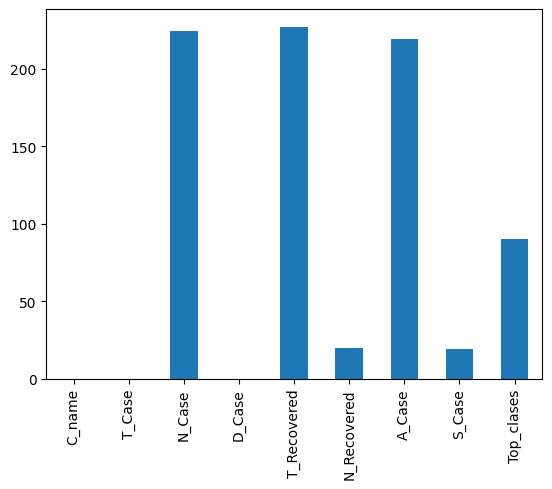

In [ ]:
missing.plot.bar()

<BarContainer object of 9 artists>

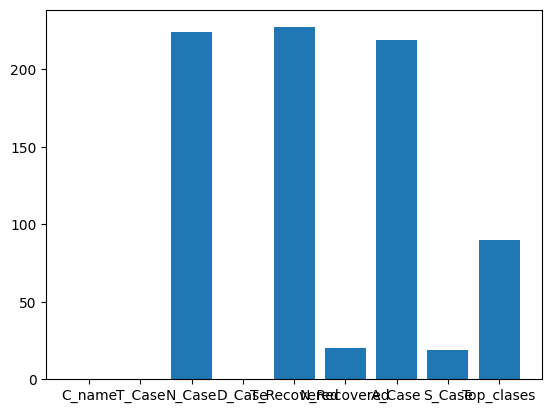

In [ ]:
plt.figuresize=(15,5)
plt.bar(x = missing.index, height = missing.values)

<AxesSubplot: >

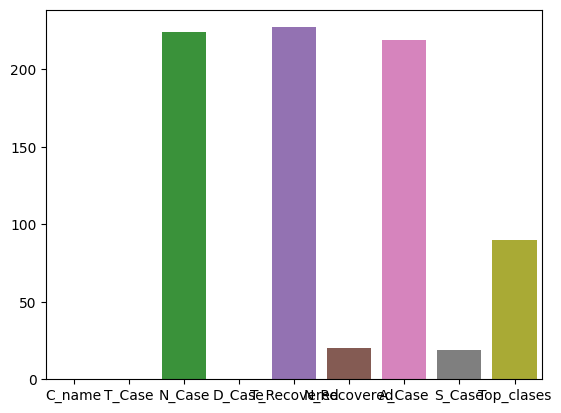

In [ ]:
sns.barplot(x=missing.index , y=missing.values)

<AxesSubplot: >

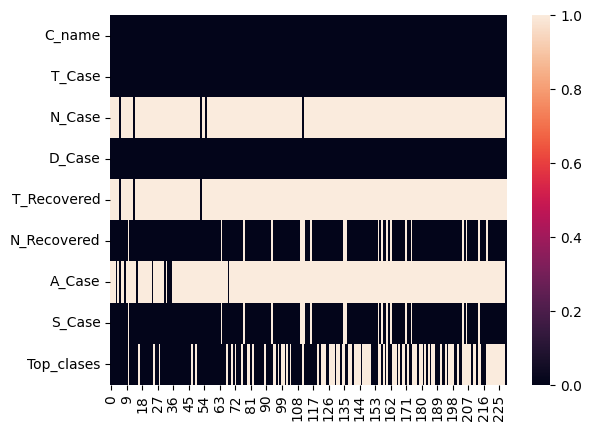

In [ ]:
sns.heatmap(covid_data.isna().transpose())